In [1]:
from pymicrostructure.markets.continuous import ContinuousDoubleAuction
from pymicrostructure.traders.market_maker import *
from pymicrostructure.traders.informed import *
from pymicrostructure.traders.noise import *
from pymicrostructure.traders.strategy import *

from pymicrostructure.visualization.summary import participant_comparison, price_path
from pymicrostructure.metrics.trader import participants_report

In [2]:
market   = ContinuousDoubleAuction(initial_fair_price=1000)

mm       = BaseMarketMaker(market,
                           fair_price_strategy=OrderFlowMagnitudeFairPrice(window=10, aggressiveness=1),
                           volume_strategy=MaxFractionVolume(fraction=0.1), 
                           spread_strategy=OrderFlowImbalanceSpread(window=5, aggressiveness=10, min_halfspread=3),
                           max_inventory=1000)

informed = TWAPInformedTrader(market)
noise    = NoiseTrader(market, submission_rate=1, volume_size=lambda:np.random.randint(1, 5))

market.run(300)

100%|██████████| 300/300 [00:00<00:00, 6478.72it/s]


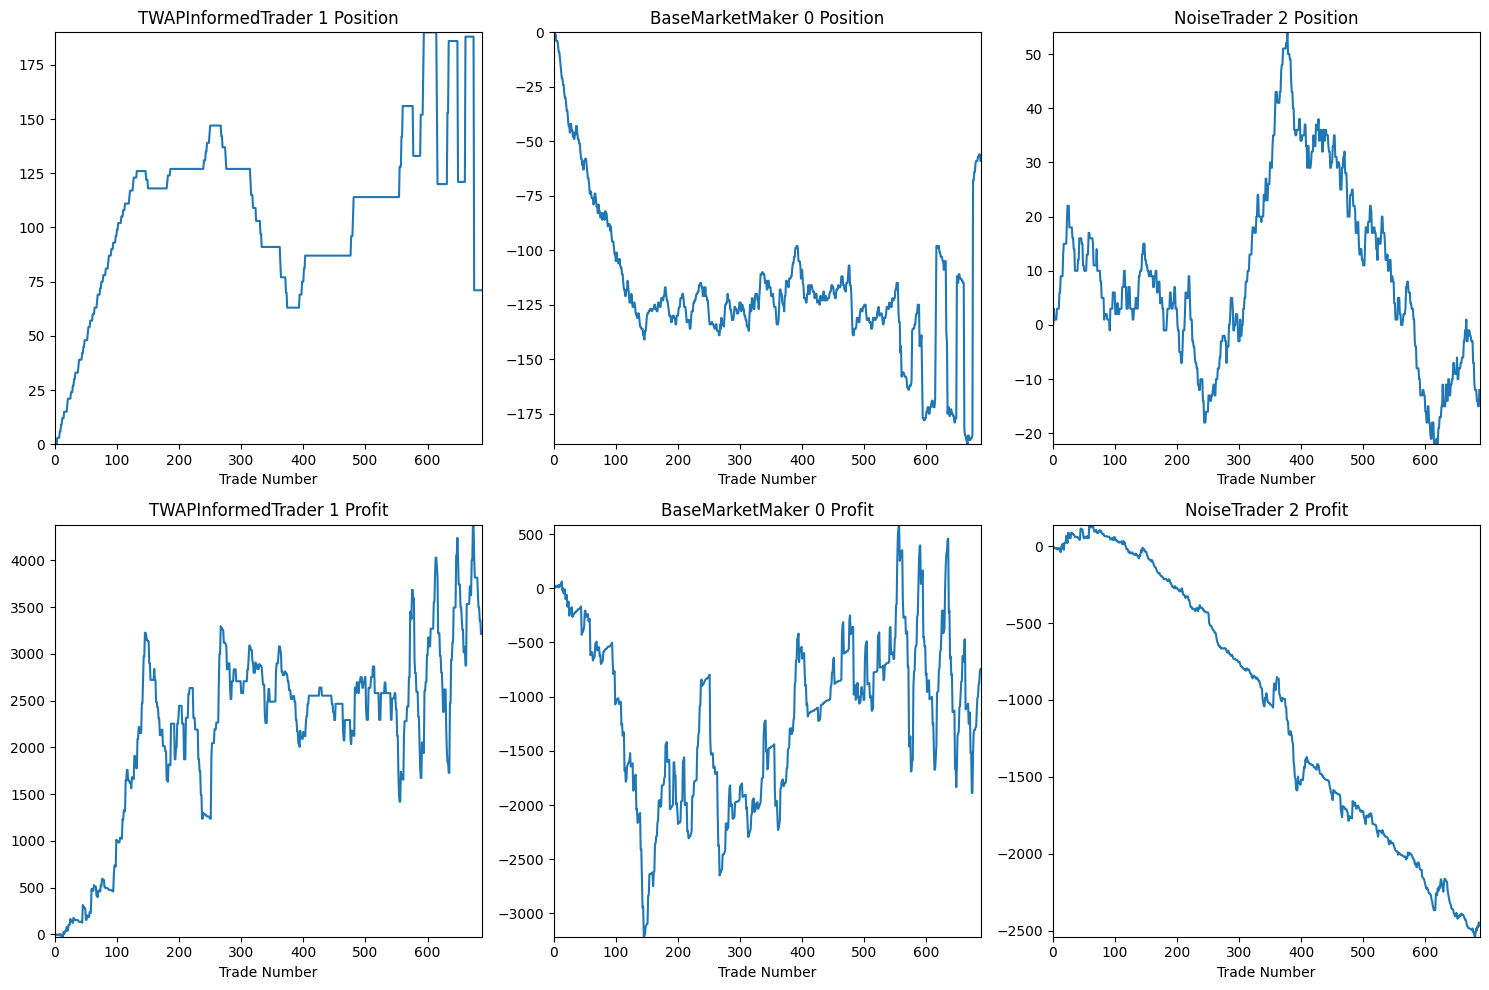

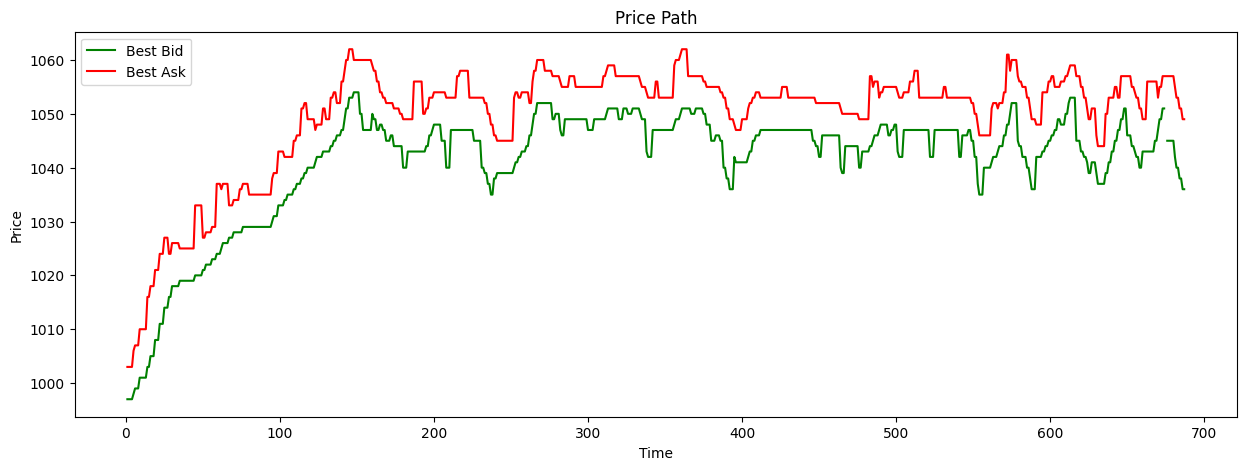

In [3]:
participant_comparison(market.participants)
price_path(market)

In [4]:
participants_report(market.participants)

,TWAPInformedTrader_1,BaseMarketMaker_0,NoiseTrader_2
final_profit,3211.50,-746.50,-2465.00
final_position,71.00,-59.00,-12.00
profit_per_state,4.67,-1.09,-3.59
std_profit_per_state,133.98,137.96,19.72
information_ratio,0.03,-0.01,-0.18
total_trades,87.00,387.00,300.00
volume_traded,805.00,1547.00,742.00
profit_per_volume,3.99,-0.48,-3.32
average_trade_size,9.25,4.00,2.47
fill_rate,0.94,0.03,1.00


In [5]:
df = participants_report(market.participants)
print(df.to_markdown())

|                      |   TWAPInformedTrader_1 |   BaseMarketMaker_0 |   NoiseTrader_2 |
|:---------------------|-----------------------:|--------------------:|----------------:|
| final_profit         |                3211.5  |             -746.5  |        -2465    |
| final_position       |                  71    |              -59    |          -12    |
| profit_per_state     |                   4.67 |               -1.09 |           -3.59 |
| std_profit_per_state |                 133.98 |              137.96 |           19.72 |
| information_ratio    |                   0.03 |               -0.01 |           -0.18 |
| total_trades         |                  87    |              387    |          300    |
| volume_traded        |                 805    |             1547    |          742    |
| profit_per_volume    |                   3.99 |               -0.48 |           -3.32 |
| average_trade_size   |                   9.25 |                4    |            2.47 |
| fill_rat

In [6]:
from pymicrostructure.metrics.market import quoted_spread

<Axes: >

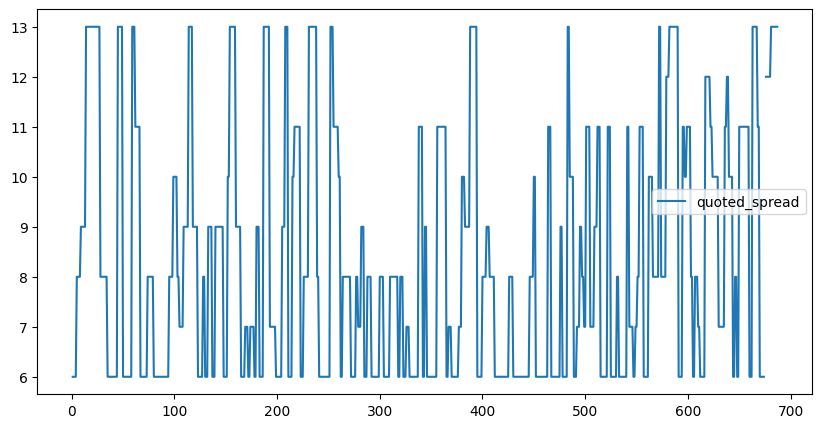

In [7]:
quoted_spread(market).plot(figsize=(10, 5))